In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


L200c comp with Nastasha

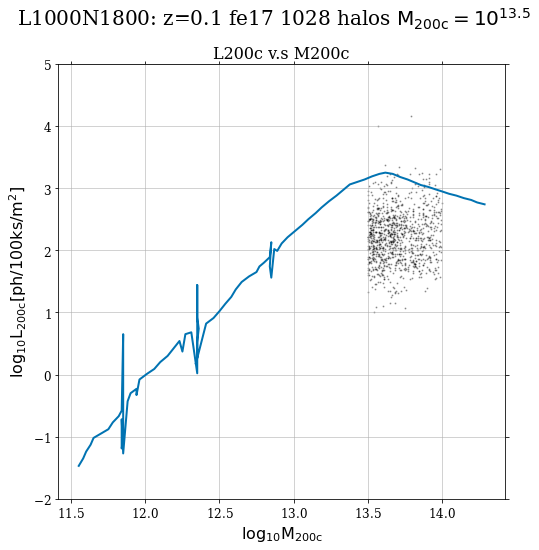

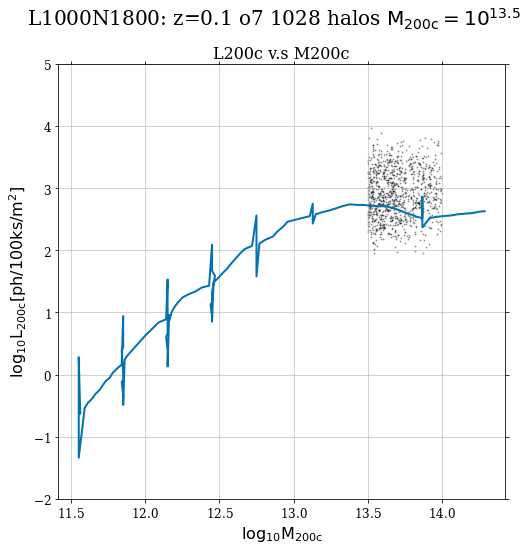

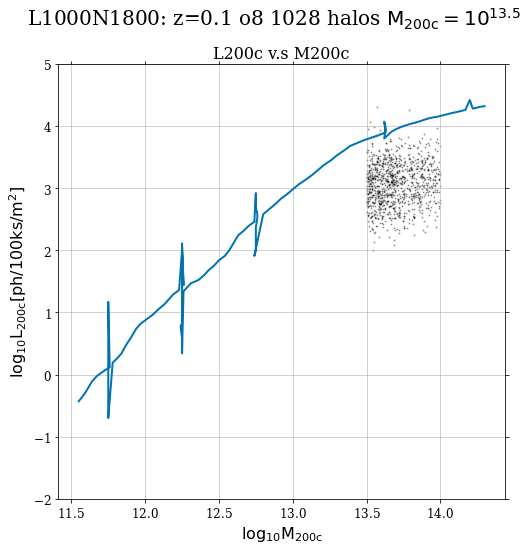

In [19]:
from unyt import m, Mpc
from glob import glob
import h5py

# basics
reds = 0.1
mf = 13.5

sim = 'L1000N1800'
snapnum = int(77-reds/0.05)
halonum = 1028

# sim = 'L1000N3600'
# snapnum = int(78-reds/0.05)
# halonum = 128

# read xray line files
workpath = '/cosma8/data/dp004/dc-chen3/work/bin/halo-radial-profile-in-snapshot/'
datapath = f'{workpath}/results/redshift_01/{sim}/profiles_230718_{mf}_ind'
nastasha_path = f'/cosma8/data/dp004/dc-chen3/work/bin/halo-radial-profile-in-snapshot/nastasha_plots_data'
xraypath = f'{workpath}/results/redshift_01/{sim}/xraysb_csvs_230718_{mf}_groups_{halonum}halos_cyl'



xbins_med = np.arange(-1.5, 1, 0.1)
r200c_msk = xbins_med<=0


# read haloids from the summary file
sumfilename = glob(f'{xraypath}/*btw*')[0]
sumfile = pd.read_csv(sumfilename)
halo_ids = sumfile['halo_ids']
# read rhp mass M200c in soap cat
with h5py.File(f"/cosma8/data/dp004/flamingo/Runs/{sim}/HYDRO_FIDUCIAL/SOAP/halo_properties_00{snapnum}.hdf5", 'r') as catalogue_soap:
    m200c_sp = catalogue_soap["SO/200_crit/TotalMass"][()]

m200c = m200c_sp[halo_ids-1]

lines = {'fe17':0.725,'o7':0.575, 'o8':0.654}

L200c = {}


L200c_med = {}
L200c_per16 = {}
L200c_per84 = {}

def keV2erg(line_in_kev):
    return 1.602e-9 * line_in_kev

def energy2photon(lum, line):
    return lum / keV2erg(line)

def lum2SB(lum, line):
    sb= energy2photon(lum, line) * 100000 / (((472.92 * Mpc).to(m)).value**2 * 4 * np.pi)
    return sb

for line in ['fe17', 'o7', 'o8']:
    L200c[line] = pd.read_csv(glob(f'{datapath}/{line}*_010dex_rhp_sph.csv')[0])

    L200c_med[line] = np.log10(lum2SB(np.sum(L200c[line][r200c_msk], axis=0), lines[line]))
    # L200c_per16[line] = np.log10(lum2SB(np.sum(L200c[line][r200c_msk]), 16, axis=0), line)
    # L200c_per84[line] = np.log10(lum2SB(np.sum(L200c[line][r200c_msk]), 84, axis=0), line)


    # read nastasha
    df =  pd.read_csv(glob(f'{nastasha_path}/L200c_{line}*.csv')[0], header = None)
    fig, ax = plt.subplots(figsize = (8,8))
    plt.title(f'L200c v.s M200c')
    plt.suptitle(f'{sim}: z={reds} {line} {halonum} halos $\\rm M_{{200c}} = 10^{{{mf}}}$ ')
    plt.plot(df[0], df[1], c = cb[0], label = 'Nastasha-EAGLE')
    
    plt.scatter(np.log10(m200c), L200c_med[line][:-1], c  = 'k', alpha = 0.3,s=1, label = 'Flamingo')
    plt.xlabel('$\\rm log_{10}M_{200c}$')
    plt.ylabel('$\\rm log_{10}L_{200c} [ph/100ks/m^2]$')
    plt.ylim(-2,5)


xray SB radial profile comp with Nastasha

In [41]:
from unyt import m, Mpc, arcsec, arcmin, kpc
from glob import glob
import h5py

def keV2erg(line_in_kev):
    return 1.602e-9 * line_in_kev

def energy2photon(lum, line):
    return lum / keV2erg(line)

def comovingArea2arcmin(area, angdist):
    '''
    area: float
        comoving area in Mpc ^2
    angdist: float
        arcsec / ckpc in FLAMINGO cosmo
    '''
    return ((area * Mpc**2 * (angdist * arcsec / kpc) **2).to(10 * arcmin **2)).value

def lum2SB(lum, line, area):
    sb= energy2photon(lum, line) * 100000 / (((472.92 * Mpc).to(m)).value**2 * 4 * np.pi) / comovingArea2arcmin(area, 0.48)
    return sb

# basics
reds = 0.1
mf = 12.5

# sim = 'L1000N1800'
# snapnum = int(77-reds/0.05)
# halonum = 1028

sim = 'L1000N3600'
snapnum = int(78-reds/0.05)
halonum = 128

# read xbins
xbins_med = np.arange(-1.5, 1, 0.1)


# read xray line files
workpath = '/cosma8/data/dp004/dc-chen3/work/bin/halo-radial-profile-in-snapshot/'
datapath = f'{workpath}/results/redshift_01/{sim}/profiles_230718_{mf}_ind'
nastasha_path = f'/cosma8/data/dp004/dc-chen3/work/bin/halo-radial-profile-in-snapshot/nastasha_plots_data'
xraypath = f'{workpath}/results/redshift_01/{sim}/xraysb_csvs_230718_{mf}_groups_{halonum}halos_cyl'

# read haloids from the summary file
sumfilename = glob(f'{xraypath}/*btw*')[0]
sumfile = pd.read_csv(sumfilename)
halo_ids = sumfile['halo_ids']
# read median r200c in soap cat
with h5py.File(f"/cosma8/data/dp004/flamingo/Runs/{sim}/HYDRO_FIDUCIAL/SOAP/halo_properties_00{snapnum}.hdf5", 'r') as catalogue_soap:
    r200c_sp = catalogue_soap["SO/200_crit/SORadius"][()]
r200c = r200c_sp[halo_ids-1]

r200c_med = np.nanmedian(r200c)
lines = {'fe17':0.725,'o7r':0.575,'o8':0.654}

L200c = {}
L200c['fe17'] = pd.read_csv(f'{datapath}/fe17_010dex_rhp_sph.csv')
L200c['o7r'] = pd.read_csv(f'{datapath}/o7f_010dex_rhp_sph.csv')
L200c['o8'] = pd.read_csv(f'{datapath}/o8_010dex_rhp_sph.csv')





/tmp/ipykernel_45295/796192572.py:6: RuntimeWarning: divide by zero encountered in log10
  L200c_med[line] = np.log10(lum2SB(np.nanmedian(L200c[line], axis=1)[:-1], lines[line], areas))
/tmp/ipykernel_45295/796192572.py:6: RuntimeWarning: divide by zero encountered in log10
  L200c_med[line] = np.log10(lum2SB(np.nanmedian(L200c[line], axis=1)[:-1], lines[line], areas))
/tmp/ipykernel_45295/796192572.py:6: RuntimeWarning: divide by zero encountered in log10
  L200c_med[line] = np.log10(lum2SB(np.nanmedian(L200c[line], axis=1)[:-1], lines[line], areas))


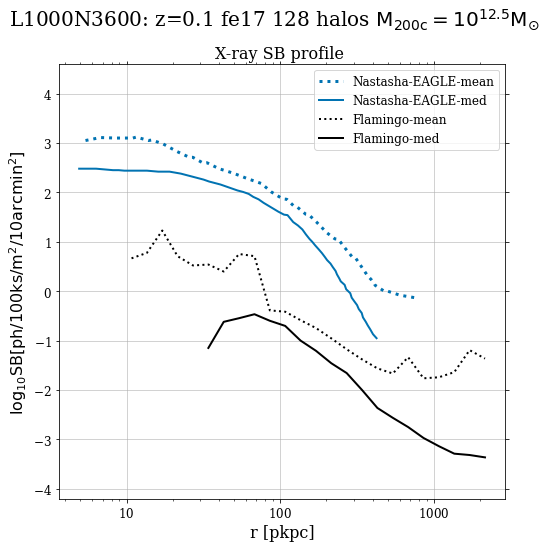

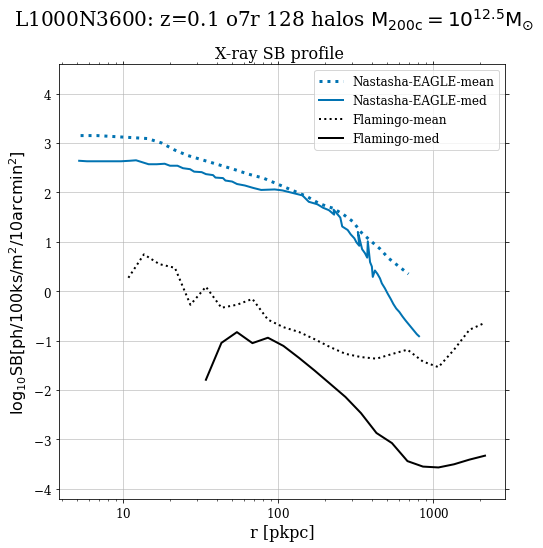

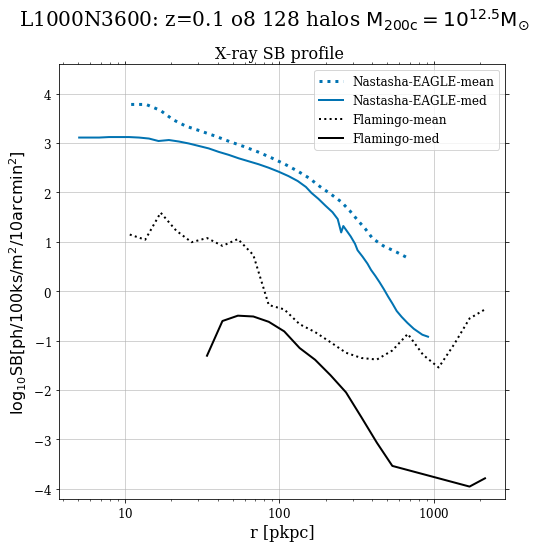

In [42]:
L200c_med = {}
L200c_mean = {}
for line in ['fe17', 'o7r', 'o8']:
        
    areas = abs(np.diff(np.power(10, xbins_med)**2)) * r200c_med * 4 * np.pi
    L200c_med[line] = np.log10(lum2SB(np.nanmedian(L200c[line], axis=1)[:-1], lines[line], areas))
    L200c_mean[line] = np.log10(lum2SB(np.nanmean(L200c[line], axis=1)[:-1], lines[line], areas))

    med_msk = L200c_med[line]>-4
    
    fig, ax = plt.subplots(figsize = (8,8))

    # read nastasha
    df =  pd.read_csv(f'{nastasha_path}/xray_sb_profile_{line}_{mf}_mean.csv', header = None)
    plt.plot(df[0], df[1], c = cb[0], linestyle = 'dotted', linewidth = 3, label = 'Nastasha-EAGLE-mean')
    df =  pd.read_csv(f'{nastasha_path}/xray_sb_profile_{line}_{mf}_med.csv', header = None)
    plt.plot(df[0], df[1], c = cb[0],  linewidth = 2, label = 'Nastasha-EAGLE-med')

    # estimate r200c bins to pkpc bins
    xbins_r200c = np.power(10,xbins_med)*r200c_med * 1000 /(1+reds)
    xbins_middle = xbins_r200c[:-1] + np.diff(xbins_r200c)/2
    
    plt.plot(xbins_middle, L200c_mean[line], c  = 'k',linestyle = 'dotted', label = 'Flamingo-mean')
    plt.plot(xbins_middle[med_msk], L200c_med[line][med_msk], c  = 'k', label = 'Flamingo-med')
    
    plt.title(f'X-ray SB profile ')
    plt.suptitle(f'{sim}: z={reds} {line} {halonum} halos $\\rm M_{{200c}} = 10^{{{mf}}} M_{{\odot}}$ ')
    plt.xscale('log')
    plt.legend()
    plt.xlabel('r [pkpc]')
    plt.ylabel('$\\rm log_{10}SB [ph/100ks/m^2/10 arcmin^2]$')
    plt.ylim(-4.2,4.6)

In [35]:
# np.power(10, xbins_med) * r200c_med *1000
# print(xbins_middle)
print(L200c_med[line][med_msk])
med_msk

[-36.08623437   1.3210802    1.57754123   1.75297562   1.71791019
   1.60058024   1.47228106   1.38775809   1.34229198   1.32037073
   1.31406026   1.22905049   0.80893076   0.20101386  -0.08357603
  -0.27112386  -0.63616908  -1.32711768  -2.08633788  -2.51460026
  -2.76204388  -3.38377771]


array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
from unyt import m, Mpc, arcsec, arcmin, kpc

def comovingArea2arcmin(area, angdist):
    '''
    area: float
        comoving area in Mpc ^2
    angdist: float
        arcsec / ckpc in FLAMINGO cosmo
    '''
    return ((area * Mpc**2 * (angdist * arcsec / kpc) **2).to(10 * arcmin **2)).value
print(comovingArea2arcmin(1, 0.48))

In [ ]:
def flamingo_lumdist(z):
    from astropy.cosmology import FlatLambdaCDM, z_at_value
    import astropy
    import astropy.units as u
    from unyt import arcmin, kpc
    m_nu = [0.02, 0.02, 0.02] * u.eV
    DESyr3 = FlatLambdaCDM(H0=68.1, Om0=0.3046, m_nu=m_nu, Ob0=0.0486, Tcmb0=2.725)
    lumdist = DESyr3.luminosity_distance(z)
    return lumdist
print(flamingo_lumdist(0.1))

In [ ]:
def flamingo_angulardist(z):
    from astropy.cosmology import FlatLambdaCDM, z_at_value
    import astropy
    import astropy.units as u
    from unyt import arcmin, kpc
    m_nu = [0.02, 0.02, 0.02] * u.eV
    DESyr3 = FlatLambdaCDM(H0=68.1, Om0=0.3046, m_nu=m_nu, Ob0=0.0486, Tcmb0=2.725)
    lumdist = DESyr3.arcsec_per_kpc_comoving(0.1)
    return lumdist
print(flamingo_angulardist(0.1))

In [5]:
def basic_figure_style():
    SMALL_SIZE = 6*2                                    
    MEDIUM_SIZE = 8*2
    BIGGER_SIZE = 10*2

    plt.rc('font', size=MEDIUM_SIZE, family='serif')          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)                     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
    plt.rc('lines', linewidth=2) 
    plt.rc('axes', grid=True) #
    plt.rc('grid', alpha=0.7) #
    plt.rc('xtick', top=True)
    plt.rc('ytick', right=True)
    plt.rc('axes.formatter', use_mathtext=True, min_exponent=4, useoffset=False)
    # plt.rc('figure', figsize='8, 6')                         # size of the figure, used to be '4, 3' in inches
basic_figure_style()
cb = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']
    ######################################################